# PERSONAL REMITTANCES PAID DEFINITION

Personal remittances, paid (current US$)

Personal remittances comprise personal transfers and compensation of employees. Personal transfers consist of all current transfers in cash or in kind made or received by resident households to or from nonresident households. Personal transfers thus include all current transfers between resident and nonresident individuals. Compensation of employees refers to the income of border, seasonal, and other short-term workers who are employed in an economy where they are not resident and of residents employed by nonresident entities. Data are the sum of two items defined in the sixth edition of the IMF's Balance of Payments Manual: personal transfers and compensation of employees. 
Data are in current U.S. dollars.

###THE OBJECTIVE OF THIS NOTEBOOK IS TO GET THE LIST OF TOP 10 COUNTRIES THAT PAY/SEND OUT PERSONAL REMITTANCE FUNDS



# Step 1 : Importing source file (CSV)


In [12]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import io

In [13]:
csv_2 ="Personal_remittances_Paid.csv"

Data_12 = pd.read_csv(csv_2, encoding="ISO-8859-1")

Data_12.head()
# file has 269 rows (country names) and many missing data

,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Personal remittances, paid (current US$)",BM.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,75642458.0,72960894.0,64916201.0,63910615.0,6.782123e+07,6.665237e+07,7.022269e+07,7.497801e+07,7.174353e+07,NaN
1,Afghanistan,AFG,"Personal remittances, paid (current US$)",BM.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,153330566.0,257128933.0,402473553.0,240078367.0,1.677290e+08,2.746177e+08,2.796524e+08,1.504098e+08,1.182164e+08,86359034.0
2,Angola,AGO,"Personal remittances, paid (current US$)",BM.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,669453676.0,715962016.0,714458886.0,564261542.0,2.051321e+09,2.395966e+09,2.746616e+09,1.252909e+09,1.176110e+09,961415276.0
3,Albania,ALB,"Personal remittances, paid (current US$)",BM.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,279697508.0,229644909.0,209353148.0,150755566.0,2.158533e+08,1.905577e+08,1.786671e+08,1.532584e+08,1.471281e+08,106256732.0
4,Andorra,AND,"Personal remittances, paid (current US$)",BM.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# THE RESULT ABOVE SHOWS THE LIST OF ALL COUNTRIES AND PROVIDES DATA SINCE 1960

# There are so many periods and countries with NA, and list of Individual countries and Regions.
# Therefore I filter my data to pull only the 6 six most recent years - 2012 through 2017
# Also filtered to includes rows of only countries with data 
#(multiple countries summed) together. 

In [14]:
# Creating a new dataframe with only necessary columns

D12_NEW = Data_12[['CountryName', 'CountryCode', 'IndicatorName', '2012', '2013', '2014', '2015', '2016', '2017']].dropna(how = 'any')



D12_NEW['6YRS TOTAL'] = (D12_NEW['2012'] /1000000000 + D12_NEW['2013']/1000000000 + D12_NEW['2014']/1000000000 + D12_NEW['2015']/1000000000 + D12_NEW['2016']/1000000000 + D12_NEW['2017']/1000000000)


D12_NEW['YEARLY AVG'] = (D12_NEW['6YRS TOTAL']/6)

D12_NEW

ALL_PAID_2 = D12_NEW.loc[D12_NEW['CountryName'] =='World']



PR_WORLD_2 = ALL_PAID_2[['2012', '2013', '2014', '2015', '2016', '2017']]

PR_WORLD_2


,2012,2013,2014,2015,2016,2017
257,3.586685e+11,3.927611e+11,4.030115e+11,3.944242e+11,3.989202e+11,4.122690e+11


In [18]:
#TRANSPOSING COLUMNS TO ROWS TO PLOT A TOTAL REMITTANCE PAID CHART

FLIP_2 = PR_WORLD_2.T.reset_index()

FLIP_2.rename(columns = {'index': 'Year', 257:'PR Paid'}, inplace=True)


FLIP_2


,Year,PR Paid
0,2012,3.586685e+11
1,2013,3.927611e+11
2,2014,4.030115e+11
3,2015,3.944242e+11
4,2016,3.989202e+11
5,2017,4.122690e+11


<IPython.core.display.Javascript object>


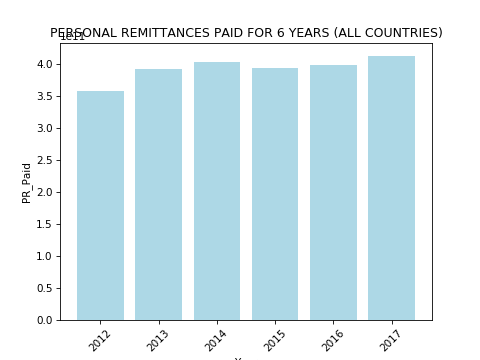

In [20]:
#PLOTTING A CHART

fig1 = plt.figure()


plt.bar(x=np.arange(6),color=('lightblue'),height=FLIP_2['PR Paid'])

#Give it a title
plt.title("PERSONAL REMITTANCES PAID FOR 6 YEARS (ALL COUNTRIES)")

#Give the x axis some labels across the tick marks.
#Argument one is the position for each label
#Argument two is the label values and the final one is to rotate our labels
plt.xticks(np.arange(6), FLIP_2['Year'], rotation=45)

#Give the x and y axes a title
plt.xlabel("Year")
plt.ylabel("PR_Paid")

plt.savefig('PR_PAID_ALL.png')

In [21]:
Yr_Avg_PR_Paid = round(FLIP_2["PR Paid"].mean()/1000000000,2)

print(f" AN AVERAGE OF ${Yr_Avg_PR_Paid} BILLION (DOLLARS) IS RECEIVED YEARLY ACROSS DIFFERENT COUNTRIES GLOBALLY")

 AN AVERAGE OF $393.34 BILLION (DOLLARS) IS RECEIVED YEARLY ACROSS DIFFERENT COUNTRIES GLOBALLY


# PULLING THE LIST OF TOP 10 COUNTRIES PAYING PERSONAL REMITTANCES

In [22]:
Top_10list12 = D12_NEW.nlargest(55, ['6YRS TOTAL']) 

Top_10list12

,CountryName,CountryCode,IndicatorName,2012,2013,2014,2015,2016,2017,6YRS TOTAL,YEARLY AVG
257,World,WLD,"Personal remittances, paid (current US$)",3.586685e+11,3.927611e+11,4.030115e+11,3.944242e+11,3.989202e+11,4.122690e+11,2360.054417,393.342403
93,High income,HIC,"Personal remittances, paid (current US$)",2.779584e+11,2.991281e+11,3.125234e+11,3.036043e+11,3.136546e+11,3.268815e+11,1833.750297,305.625049
179,OECD members,OED,"Personal remittances, paid (current US$)",2.066360e+11,2.189608e+11,2.283360e+11,2.187344e+11,2.301578e+11,2.461004e+11,1348.925473,224.820912
196,Post-demographic dividend,PST,"Personal remittances, paid (current US$)",2.014503e+11,2.130054e+11,2.218620e+11,2.115103e+11,2.213781e+11,2.340418e+11,1303.248025,217.208004
63,Europe & Central Asia,ECS,"Personal remittances, paid (current US$)",1.643438e+11,1.803909e+11,1.801646e+11,1.549242e+11,1.546708e+11,1.689369e+11,1003.431296,167.238549
140,Late-demographic dividend,LTE,"Personal remittances, paid (current US$)",9.410143e+10,1.054549e+11,1.070321e+11,1.067612e+11,1.027622e+11,1.059439e+11,622.055637,103.675940
71,European Union,EUU,"Personal remittances, paid (current US$)",9.650471e+10,1.036284e+11,1.063830e+11,9.836020e+10,1.027359e+11,1.108565e+11,618.468739,103.078123
101,IDA & IBRD total,IBT,"Personal remittances, paid (current US$)",8.451952e+10,9.755189e+10,9.514374e+10,9.597730e+10,9.183403e+10,9.437521e+10,559.401690,93.233615
151,Middle East & North Africa,MEA,"Personal remittances, paid (current US$)",7.951645e+10,9.123665e+10,9.273800e+10,9.203625e+10,9.055923e+10,8.762445e+10,533.711035,88.951839
138,Low & middle income,LMY,"Personal remittances, paid (current US$)",8.071010e+10,9.363300e+10,9.048806e+10,9.081983e+10,8.526561e+10,8.538751e+10,526.304120,87.717353


In [23]:
Top_10list12['CountryName'].unique()

array(['World', 'High income', 'OECD members',
       'Post-demographic dividend', 'Europe & Central Asia',
       'Late-demographic dividend', 'European Union', 'IDA & IBRD total',
       'Middle East & North Africa', 'Low & middle income', 'IBRD only',
       'Middle income', 'Arab World', 'Euro area', 'North America',
       'Early-demographic dividend', 'Upper middle income',
       'United States', 'East Asia & Pacific',
       'Europe & Central Asia (IDA & IBRD countries)', 'Saudi Arabia',
       'Europe & Central Asia (excluding high income)',
       'Russian Federation', 'Switzerland',
       'East Asia & Pacific (IDA & IBRD countries)',
       'East Asia & Pacific (excluding high income)',
       'Lower middle income', 'Germany', 'Small states',
       'Other small states', 'Kuwait', 'France', 'Luxembourg', 'Qatar',
       'China', 'United Kingdom', 'Italy',
       'Fragile and conflict affected situations', 'Netherlands',
       'Korea, Rep.', 'Oman', 'IDA total', 'Sub-Sahara

# Manually selected the list of the TOP 10 Countires. Excluding all aggregates 

In [24]:
 

Top10list = ( 'United States',  'Saudi Arabia', 'Russian Federation', 'Switzerland','Germany',  'Kuwait', 'France', 'Luxembourg', 'Qatar',
       'China')
#DevelopmentClass = ('Developing', 'Developing', 'Developing', 'Developing', 'Developed', 'Developing', 'Developing', 'Developed','Developing')  
#Region = ('South Asia', 'Asia', 'Europe', 'Central America', 'Europe', 'West Africa', 'North Africa', 'South Asia', 'South Asia', 'South Asia')

# Creating a Dataframe for the top 10 countries

In [25]:
TOP10_PAID_1 = D12_NEW[D12_NEW.CountryName.isin([ 'United States',  'Saudi Arabia', 'Russian Federation', 'Switzerland','Germany',  'Kuwait', 
                                                 'France', 'Luxembourg', 'Qatar','China'])]

TOP10_PAID_1 = TOP10_PAID_1.sort_values('6YRS TOTAL',ascending=False)

TOP10_PAID_1

TOP10_PAID_1['CountryClass'] = ['Developed', 'Developing', 'In-Transit', 'Developed', 'Developed', 
                                'Developing', 'Developed', 'Developed', 'Developing','Developing']

TOP10_PAID_1['Region'] = ['America', 'Western Asia', 'East Europe', 'Europe', 'Europe', 'Western Asia', 'Europe', 'Europe', 'Western Asia', 'Asia']

TOP10_PAID_NEW = TOP10_PAID_1[[ 'CountryName' , 'CountryCode', 'CountryClass' , 'Region', '2012', '2013' , '2014', '2015' , '2016', '2017', '6YRS TOTAL', 'YEARLY AVG']]

TOP10_PAID_NEW.head(10)

,CountryName,CountryCode,CountryClass,Region,2012,2013,2014,2015,2016,2017,6YRS TOTAL,YEARLY AVG
249,United States,USA,Developed,America,5.265200e+10,5.566900e+10,5.888200e+10,6.185900e+10,6.511100e+10,6.796400e+10,362.137000,60.356167
203,Saudi Arabia,SAU,Developing,Western Asia,2.949257e+10,3.498419e+10,3.692424e+10,3.878737e+10,3.784321e+10,3.611888e+10,214.150450,35.691742
200,Russian Federation,RUS,In-Transit,East Europe,3.164770e+10,3.721668e+10,3.264036e+10,1.968884e+10,1.624442e+10,2.061014e+10,158.048140,26.341357
35,Switzerland,CHE,Developed,Europe,2.292718e+10,2.466345e+10,2.586902e+10,2.540042e+10,2.577449e+10,2.659779e+10,151.232354,25.205392
53,Germany,DEU,Developed,Europe,1.558763e+10,1.997867e+10,2.007799e+10,1.803331e+10,2.028974e+10,2.209077e+10,116.058123,19.343020
125,Kuwait,KWT,Developing,Western Asia,1.545920e+10,1.771148e+10,1.812848e+10,1.520254e+10,1.528757e+10,1.376011e+10,95.549372,15.924895
75,France,FRA,Developed,Europe,1.256563e+10,1.342517e+10,1.372593e+10,1.278701e+10,1.331152e+10,1.350343e+10,79.318700,13.219783
142,Luxembourg,LUX,Developed,Europe,1.134320e+10,1.223686e+10,1.286489e+10,1.117850e+10,1.164026e+10,1.266582e+10,71.929525,11.988254
198,Qatar,QAT,Developing,Western Asia,1.041291e+10,1.128104e+10,1.123022e+10,1.219203e+10,1.198187e+10,1.275934e+10,69.857418,11.642903
38,China,CHN,Developing,Asia,1.788059e+09,1.714203e+09,4.155302e+09,2.042178e+10,2.028600e+10,1.617771e+10,64.543043,10.757174


<IPython.core.display.Javascript object>


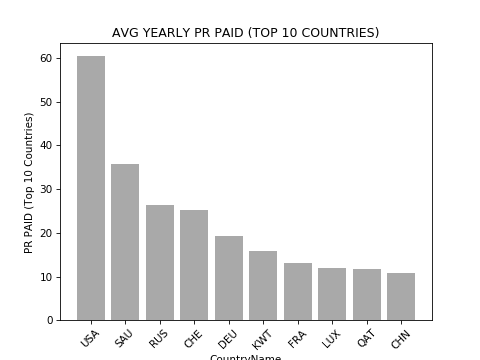

In [27]:
#PLotting chart of Top 10 countries 


fig2 = plt.figure()


plt.bar(x=np.arange(10),color=('darkgrey'),height=TOP10_PAID_NEW['YEARLY AVG'])

#Give it a titlelt.title("AVG YEARLY PERSONAL REMITTANCES RECEVIED FOR 6 YEARS (ALL COUNTRIES)")

#Give it a title
plt.title("AVG YEARLY PR PAID (TOP 10 COUNTRIES)")

#Give the x axis some labels across the tick marks.
#Argument one is the position for each label
#Argument two is the label values and the final one is to rotate our labels
plt.xticks(np.arange(10), TOP10_PAID_NEW['CountryCode'], rotation=45)

#Give the x and y axes a title
plt.xlabel("CountryName")
plt.ylabel("PR PAID (Top 10 Countries)")

plt.savefig('PR_PAID_TOP_10_Countries.png')

# THE UNITED STATES IS THE BIGGEST COUNTRY FOR THE OUTFLOW OF PERSONAL REMITTANCE FUNDS WITH OVER $60 BILLLION SENT OUT
ANNUALLY 

# TOP 10 PR PAYING COUNTRIES BY COUNTRY CLASS

<IPython.core.display.Javascript object>


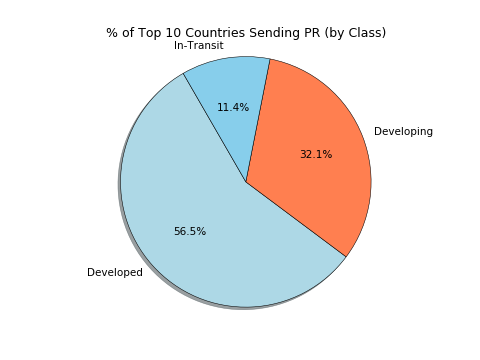

In [28]:
#group by type to be used by all pie charts
by_class2 = TOP10_PAID_NEW.groupby('CountryClass')['CountryClass', 'CountryName', 'CountryCode', 'Region', '6YRS TOTAL']

fig3 = plt.figure()

#total fare by city
grp12 = by_class2.sum()['6YRS TOTAL']

#pie chart build
labels = grp12.index


#colors and exploe the same for all pie charts, reference here
colors = [ 'LIGHTblue', 'Coral', 'SKYBLUE']
explode = [0 ,0, 0]
plt.pie(grp12, startangle = 120, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})


# save chart


#pie chart display
plt.title('% of Top 10 Countries Sending PR (by Class)')
plt.axis('equal')
plt.savefig('PR PAID_Top 10_by Class.png')


In [29]:
TOP10_TTL = TOP10_PAID_NEW['6YRS TOTAL'].sum()
WORLD_TTL = FLIP_2['PR Paid'].sum()

avg = TOP10_TTL / WORLD_TTL 

print(TOP10_TTL)
print(WORLD_TTL )
print(avg)

TOP10_PAID_NEW.nunique()

1382.8241240729997
2360054416882.0
5.859289151052398e-10


CountryName     10
CountryCode     10
CountryClass     3
Region           5
2012            10
2013            10
2014            10
2015            10
2016            10
2017            10
6YRS TOTAL      10
YEARLY AVG      10
dtype: int64

# TOP 10 PAYING COUNTRIES BY REGION 

<IPython.core.display.Javascript object>


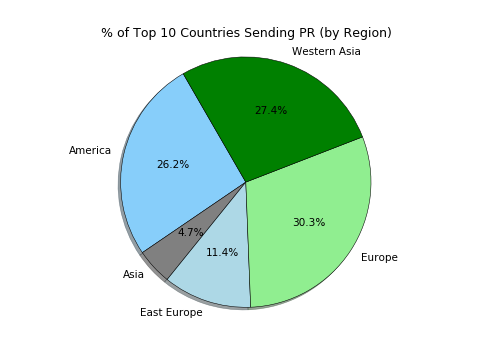

In [31]:
#group by type to be used by all pie charts
by_region2 = TOP10_PAID_NEW.groupby('Region')['Region', 'CountryClass', 'CountryCode', 'CountryName', '6YRS TOTAL']


fig4 = plt.figure()


#total fare by city
grp22 = by_region2.sum()['6YRS TOTAL']

#pie chart build
label2 = grp22.index


#colors and exploe the same for all pie charts, reference here
colors = [ 'lightskyblue', 'grey', 'lightblue', 'lightgreen','green']
explode = [0,0,0,0,0]
plt.pie(grp22, startangle = 120,  explode = explode, labels = label2, colors= colors, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})


# save chart


#pie chart display
plt.title('% of Top 10 Countries Sending PR (by Region)')
plt.axis('equal')
plt.savefig('PR PAID_Top 10_by Region.png')

# INSERTING COUNTRY GDP DATA 

In [32]:
csv_22 ="Country_GDP.csv"

Data_GDP1 = pd.read_csv(csv_22, encoding="ISO-8859-1")


Data_GDP1.head()
# file has 269 rows (country names) and many missing data

,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.0,548888896.0,546666678.0,751111191.0,800000044.0,1.006667e+09,...,1.243909e+10,1.585657e+10,1.780429e+10,1.990732e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.904636e+10,1.954398e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.030716e+10,8.379950e+10,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.188368e+10,1.303854e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


# DATAFRAME TO SHOW ONLY THE NECESSARY PERIODS 

In [33]:
# Creating a new dataframe with only necessary columns

GDP_PAID = Data_GDP1[['CountryName', 'CountryCode', 'IndicatorName', '2012', '2013', '2014', '2015', '2016', '2017']].dropna(how = 'any')



GDP_PAID['6YRS GDP TOTAL'] = (GDP_PAID['2012'] /1000000000 + GDP_PAID['2013']/1000000000 + GDP_PAID['2014']/1000000000 + GDP_PAID['2015']/1000000000 + GDP_PAID['2016']/1000000000 + GDP_PAID['2017']/1000000000)


GDP_PAID['YEARLY GDP AVG'] = (GDP_PAID['6YRS GDP TOTAL']/6)

GDP_PAID


,CountryName,CountryCode,IndicatorName,2012,2013,2014,2015,2016,2017,6YRS GDP TOTAL,YEARLY GDP AVG
0,Aruba,ABW,GDP (current US$),2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,15.805028,2.634171
1,Afghanistan,AFG,GDP (current US$),1.990732e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.904636e+10,1.954398e+10,119.450718,19.908453
2,Angola,AGO,GDP (current US$),1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,749.917000,124.986167
3,Albania,ALB,GDP (current US$),1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.188368e+10,1.303854e+10,74.633466,12.438911
4,Andorra,AND,GDP (current US$),3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,18.498652,3.083109
5,Arab World,ARB,GDP (current US$),2.786790e+12,2.866860e+12,2.908390e+12,2.560750e+12,2.513940e+12,2.586310e+12,16223.040000,2703.840000
6,United Arab Emirates,ARE,GDP (current US$),3.745910e+11,3.901080e+11,4.031370e+11,3.581350e+11,3.570450e+11,3.825750e+11,2265.591000,377.598500
7,Argentina,ARG,GDP (current US$),5.459820e+11,5.520250e+11,5.263200e+11,5.947490e+11,5.548610e+11,6.374300e+11,3411.367000,568.561167
8,Armenia,ARM,GDP (current US$),1.061932e+10,1.112147e+10,1.160951e+10,1.055334e+10,1.054614e+10,1.153659e+10,65.986362,10.997727
9,American Samoa,ASM,GDP (current US$),6.440000e+08,6.410000e+08,6.430000e+08,6.610000e+08,6.530000e+08,6.340000e+08,3.876000,0.646000


In [34]:
GDP_PAID_TOP10 = GDP_PAID.loc[GDP_PAID['CountryName'].isin (['United States',  'Saudi Arabia', 'Russian Federation', 'Switzerland','Germany',  'Kuwait', 
                                                 'France', 'Luxembourg', 'Qatar','China'])]

#print(df.loc[df['A'] == 'foo']) - single row value
#df.loc[df['B'].isin(['one','three'])] - multiple row value 

PR_WORLD_GDP = GDP_PAID_TOP10[['CountryName', 'CountryCode', '2012', '2013', '2014', '2015', '2016', '2017', '6YRS GDP TOTAL', 'YEARLY GDP AVG']]

PR_WORLD_GDP

,CountryName,CountryCode,2012,2013,2014,2015,2016,2017,6YRS GDP TOTAL,YEARLY GDP AVG
35,Switzerland,CHE,6.680440e+11,6.885040e+11,7.091830e+11,6.792890e+11,6.687450e+11,6.788870e+11,4092.652000,682.108667
38,China,CHN,8.560550e+12,9.607220e+12,1.048240e+13,1.106470e+13,1.119100e+13,1.223770e+13,63143.570000,10523.928333
53,Germany,DEU,3.543980e+12,3.752510e+12,3.890610e+12,3.375610e+12,3.477800e+12,3.677440e+12,21717.950000,3619.658333
75,France,FRA,2.683830e+12,2.811080e+12,2.852170e+12,2.438210e+12,2.465130e+12,2.582500e+12,15832.920000,2638.820000
125,Kuwait,KWT,1.740700e+11,1.741610e+11,1.626310e+11,1.145670e+11,1.109120e+11,1.201260e+11,856.467000,142.744500
142,Luxembourg,LUX,5.667796e+10,6.173935e+10,6.632734e+10,5.778450e+10,5.863132e+10,6.240446e+10,363.564939,60.594157
198,Qatar,QAT,1.868340e+11,1.987280e+11,2.062250e+11,1.617400e+11,1.517320e+11,1.669290e+11,1072.188000,178.698000
200,Russian Federation,RUS,2.210260e+12,2.297130e+12,2.063660e+12,1.368400e+12,1.284730e+12,1.577520e+12,10801.700000,1800.283333
203,Saudi Arabia,SAU,7.359750e+11,7.466470e+11,7.563500e+11,6.542700e+11,6.449360e+11,6.867380e+11,4224.916000,704.152667
249,United States,USA,1.615530e+13,1.669150e+13,1.742760e+13,1.812070e+13,1.862450e+13,1.939060e+13,106410.200000,17735.033333


In [35]:
combined22=pd.DataFrame.merge( PR_WORLD_GDP, TOP10_PAID_NEW, on = ['CountryName', 'CountryCode']).reset_index()

In [36]:
combined22 = combined22[['CountryName', 'CountryCode', 'Region', 'CountryClass','6YRS TOTAL', '6YRS GDP TOTAL', 'YEARLY AVG', 'YEARLY GDP AVG']]

In [37]:
combined22

,CountryName,CountryCode,Region,CountryClass,6YRS TOTAL,6YRS GDP TOTAL,YEARLY AVG,YEARLY GDP AVG
0,Switzerland,CHE,Europe,Developed,151.232354,4092.652000,25.205392,682.108667
1,China,CHN,Asia,Developing,64.543043,63143.570000,10.757174,10523.928333
2,Germany,DEU,Europe,Developed,116.058123,21717.950000,19.343020,3619.658333
3,France,FRA,Europe,Developed,79.318700,15832.920000,13.219783,2638.820000
4,Kuwait,KWT,Western Asia,Developing,95.549372,856.467000,15.924895,142.744500
5,Luxembourg,LUX,Europe,Developed,71.929525,363.564939,11.988254,60.594157
6,Qatar,QAT,Western Asia,Developing,69.857418,1072.188000,11.642903,178.698000
7,Russian Federation,RUS,East Europe,In-Transit,158.048140,10801.700000,26.341357,1800.283333
8,Saudi Arabia,SAU,Western Asia,Developing,214.150450,4224.916000,35.691742,704.152667
9,United States,USA,America,Developed,362.137000,106410.200000,60.356167,17735.033333


In [38]:
# Sorting dataframe by City type and re-arrange column position

combineD22 = combined22.sort_values('CountryClass', ascending = False)

combined_22 = combined22[['CountryClass', "CountryName" ,'YEARLY AVG', 'YEARLY GDP AVG']]
 
combined_22['Class'] = [1, 3, 1, 1, 3, 1, 3,2, 3, 1]

combined_22 = combined_22.rename(columns={'YEARLY AVG' : "PR_YR_AVG", "YEARLY GDP AVG" : "GDP_YR_AVG"})

combined_22

C:\Users\Ayoola\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,CountryClass,CountryName,PR_YR_AVG,GDP_YR_AVG,Class
0,Developed,Switzerland,25.205392,682.108667,1
1,Developing,China,10.757174,10523.928333,3
2,Developed,Germany,19.343020,3619.658333,1
3,Developed,France,13.219783,2638.820000,1
4,Developing,Kuwait,15.924895,142.744500,3
5,Developed,Luxembourg,11.988254,60.594157,1
6,Developing,Qatar,11.642903,178.698000,3
7,In-Transit,Russian Federation,26.341357,1800.283333,2
8,Developing,Saudi Arabia,35.691742,704.152667,3
9,Developed,United States,60.356167,17735.033333,1


# BUBBLE PLOT TO SHOW THE RELATIONSHIP BETWEEN AVERAGE YEARLY REMITTANCES SENT (x-axis) AND THE GDP VALUE OF THE COUNTRY (y-axis)

<IPython.core.display.Javascript object>


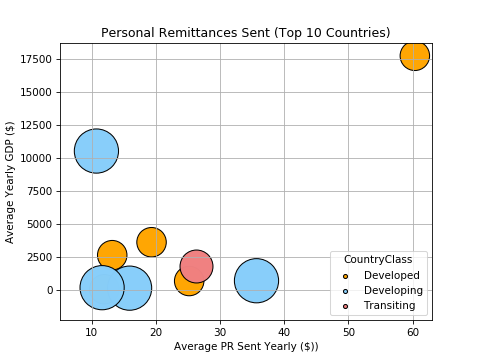

AttributeError: Unknown property axis

In [40]:
#plt.scatter(combined_22.GDP_YR_AVG, combined_22.PR_YR_AVG, s=combined_22.Class)

combined_22.plot(kind='scatter', x="PR_YR_AVG", y='GDP_YR_AVG', s=combined_22.Class, axis= [10, 65, 0, 18000])


In [41]:
Developed = combined_22[combined_22['CountryClass']=='Developed']
Developing = combined_22[combined_22['CountryClass']=='Developing']
Transiting = combined_22[combined_22['CountryClass']=='In-Transit']

plt.scatter(Developed['PR_YR_AVG'], Developed['GDP_YR_AVG'],  s = Developed['Class']*800, marker='o', color ='Orange', edgecolor ='black', alpha=0.99, label='Developed' )
plt.scatter(Developing['PR_YR_AVG'], Developing['GDP_YR_AVG'], s = Developing['Class']*600, marker='o', color ='LightSkyBlue', edgecolor ='black', alpha=0.99, label='Developing' )
plt.scatter(Transiting['PR_YR_AVG'], Transiting['GDP_YR_AVG'], s = Transiting['Class']*500, marker='o', color ='LightCoral', edgecolor ='black', alpha=0.99, label='Transiting' )
plt.grid()



# labels definition 

plt.title("Personal Remittances Sent (Top 10 Countries)")
plt.xlabel("Average PR Sent Yearly ($))")
plt.ylabel("Average Yearly GDP ($)")

# city type label

lgnd=plt.legend(title="CountryClass", loc = "lower right", frameon = True )
axis= ([10, 65, 0, 19000])
lgnd.legendHandles[0]._sizes=[15]
lgnd.legendHandles[1]._sizes=[15]
lgnd.legendHandles[2]._sizes=[15]

plt.savefig('BubbleploT PR Sent (Top 10 Countries).png')      

plt.show()


# CHART RESULTS EXPLAINED IN POWER POINT FILE

# THE END 